<a href="https://colab.research.google.com/github/Abhinavk910/Deep-Learning/blob/master/Predicting%20Image/%20Hand%20Written%20Number%20/Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import  confusion_matrix
import itertools


In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

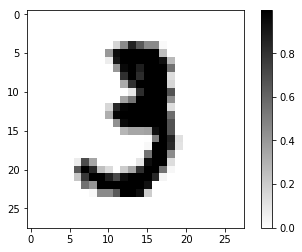

In [0]:
plt.figure()
plt.imshow(x_train[10], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

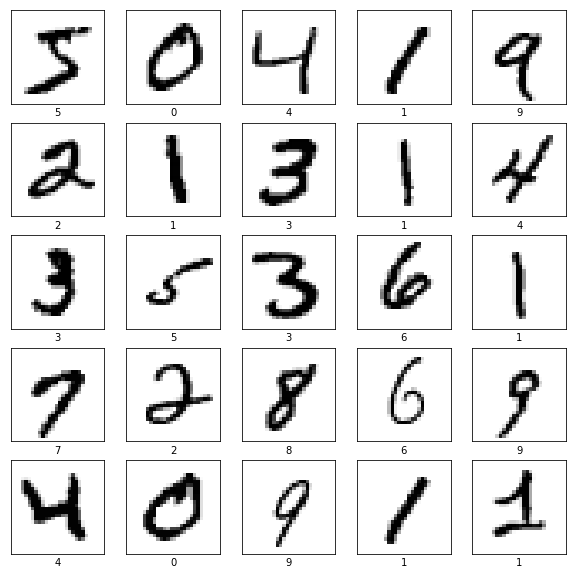

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

In [0]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [0]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1_history = model1.fit(x_train, y_train, epochs=20, batch_size = 32 ,validation_data = (x_test, y_test),verbose = 1)

W0818 14:47:21.560757 140564979758976 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1994 - acc: 0.9416 - val_loss: 0.1082 - val_acc: 0.9662
Epoch 2/20
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0801 - acc: 0.9750 - val_loss: 0.0774 - val_acc: 0.9768
Epoch 3/20
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0523 - acc: 0.9836 - val_loss: 0.0707 - val_acc: 0.9773
Epoch 4/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0374 - acc: 0.9877 - val_loss: 0.0765 - val_acc: 0.9759
Epoch 5/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0267 - acc: 0.9913 - val_loss: 0.0798 - val_acc: 0.9761
Epoch 6/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0215 - acc: 0.9933 - val_loss: 0.0669 - val_acc: 0.9813
Epoch 7/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0183 - acc: 0.9938 - val_loss

**Human Level Error** :- 0 % 

**Training Error** :- 0.19 %

**Validation  Error** :- 2.20 %

There is Overfitting

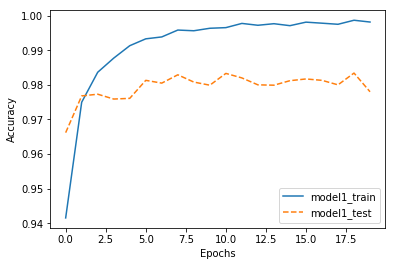

In [0]:
def accuracy_plot(model_history, key):
  plt.plot(model_history.epoch, model_history.history['acc'], label = key +'_train')
  plt.plot(model_history.epoch, model_history.history['val_acc'],'--', label = key+'_test')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend();

accuracy_plot(model1_history, 'model1')

In [0]:
# Get more training data.
# Data-augmentation
# Reduce the capacity of the network.
# Add weight regularization.
# Add dropout.
# Batch normalization

# Data Augmentation

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,   
        rotation_range=20, 
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False, 
        vertical_flip=False)

datagen.fit(x_train)

In [0]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2_history = model2.fit_generator(datagen.flow(x_train, y_train), epochs = 20, validation_data = (x_test,y_test),
                                      steps_per_epoch=x_train.shape[0] // 32)


Epoch 1/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4594 - acc: 0.8619 - val_loss: 0.1245 - val_acc: 0.9630
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2174 - acc: 0.9349 - val_loss: 0.0929 - val_acc: 0.9697
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1767 - acc: 0.9469 - val_loss: 0.0927 - val_acc: 0.9725
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1591 - acc: 0.9526 - val_loss: 0.0689 - val_acc: 0.9786
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1443 - acc: 0.9562 - val_loss: 0.0599 - val_acc: 0.9812
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1339 - acc: 0.9596 - val_loss: 0.0578 - val_acc: 0.9799
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1244 - acc: 0.9611 - val_loss: 0.0588 - val_acc: 0.9819
Epoch 8/20
1875/1875 [==========================

In [0]:
model2_history = model2.fit_generator(datagen.flow(x_train, y_train), epochs = 60, initial_epoch=20, validation_data = (x_test,y_test),
                                      steps_per_epoch=x_train.shape[0] // 32)

Epoch 21/60
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0929 - acc: 0.9718 - val_loss: 0.0496 - val_acc: 0.9845
Epoch 22/60
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0914 - acc: 0.9729 - val_loss: 0.0395 - val_acc: 0.9881
Epoch 23/60
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0883 - acc: 0.9735 - val_loss: 0.0429 - val_acc: 0.9859
Epoch 24/60
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0897 - acc: 0.9730 - val_loss: 0.0458 - val_acc: 0.9860
Epoch 25/60
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0841 - acc: 0.9749 - val_loss: 0.0461 - val_acc: 0.9841
Epoch 26/60
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0873 - acc: 0.9736 - val_loss: 0.0441 - val_acc: 0.9860
Epoch 27/60
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0837 - acc: 0.9747 - val_loss: 0.0466 - val_acc: 0.9836
Epoch 28/60
1875/1875 [==================

Model underfitting now. So, increase model capacity 

In [0]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3_history = model3.fit_generator(datagen.flow(x_train, y_train), epochs = 40, validation_data = (x_test,y_test),
                                      steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/40
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3934 - acc: 0.8756 - val_loss: 0.1280 - val_acc: 0.9586
Epoch 2/40
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1976 - acc: 0.9379 - val_loss: 0.0878 - val_acc: 0.9734
Epoch 3/40
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1630 - acc: 0.9490 - val_loss: 0.0740 - val_acc: 0.9780
Epoch 4/40
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1412 - acc: 0.9556 - val_loss: 0.0627 - val_acc: 0.9794
Epoch 5/40
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1291 - acc: 0.9596 - val_loss: 0.0549 - val_acc: 0.9825
Epoch 6/40
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1191 - acc: 0.9640 - val_loss: 0.0569 - val_acc: 0.9833
Epoch 7/40
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1129 - acc: 0.9651 - val_loss: 0.0616 - val_acc: 0.9810
Epoch 8/40
1875/1875 [==========================

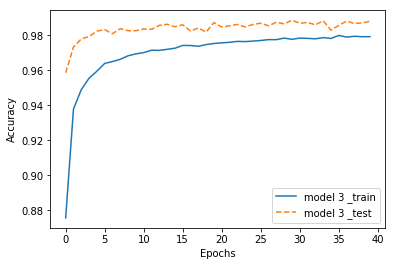

In [0]:
accuracy_plot(model3_history, 'model 3 ')

In [0]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model4_history = model4.fit_generator(datagen.flow(x_train, y_train), epochs = 50, validation_data = (x_test,y_test),
                                      steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4181 - acc: 0.8662 - val_loss: 0.1176 - val_acc: 0.9635
Epoch 2/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2080 - acc: 0.9354 - val_loss: 0.1105 - val_acc: 0.9659
Epoch 3/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1696 - acc: 0.9472 - val_loss: 0.0939 - val_acc: 0.9702
Epoch 4/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1535 - acc: 0.9528 - val_loss: 0.0971 - val_acc: 0.9697
Epoch 5/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1354 - acc: 0.9582 - val_loss: 0.0758 - val_acc: 0.9738
Epoch 6/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1262 - acc: 0.9610 - val_loss: 0.0703 - val_acc: 0.9787
Epoch 7/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1200 - acc: 0.9628 - val_loss: 0.0599 - val_acc: 0.9816
Epoch 8/50
1875/1875 [==========================

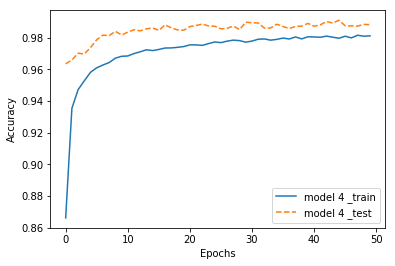

In [0]:
accuracy_plot(model4_history, 'model 4 ')

In [0]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model5_history = model5.fit_generator(datagen.flow(x_train, y_train), epochs = 50, validation_data = (x_test,y_test),
                                      steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4315 - acc: 0.8631 - val_loss: 0.1345 - val_acc: 0.9606
Epoch 2/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2143 - acc: 0.9332 - val_loss: 0.1116 - val_acc: 0.9645
Epoch 3/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1774 - acc: 0.9468 - val_loss: 0.0866 - val_acc: 0.9738
Epoch 4/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1522 - acc: 0.9540 - val_loss: 0.0683 - val_acc: 0.9790
Epoch 5/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1441 - acc: 0.9552 - val_loss: 0.0674 - val_acc: 0.9800
Epoch 6/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1315 - acc: 0.9594 - val_loss: 0.0793 - val_acc: 0.9751
Epoch 7/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1231 - acc: 0.9624 - val_loss: 0.0647 - val_acc: 0.9799
Epoch 8/50
1875/1875 [==========================

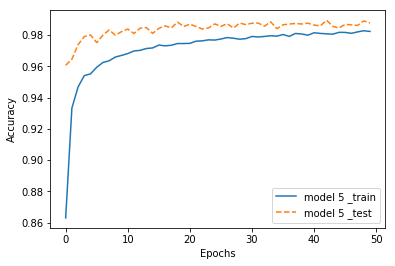

In [0]:
accuracy_plot(model5_history, 'model 5 ')

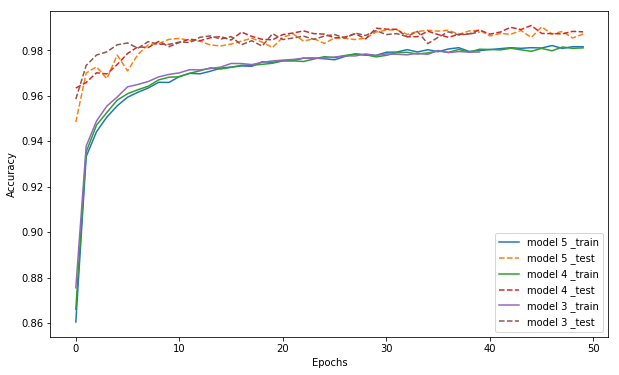

In [0]:
plt.figure(figsize=(10,6))
accuracy_plot(model5_history, 'model 5 ')
accuracy_plot(model4_history, 'model 4 ')
accuracy_plot(model3_history, 'model 3 ')

# Plot

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


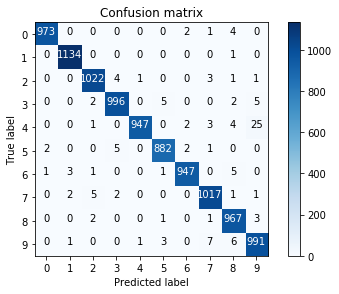

In [26]:
Y_pred = model5.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test, axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  plt.xlabel("Pred. {} ({:2.0f}%), Orig. {}".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label))


def plot_value_array(i, predictions_array, true_label):

  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [28]:
predictions = model5.predict(x_test)
false = np.where(np.argmax(predictions, axis = 1) != np.argmax(y_test, axis = 1))[0]
print(f'There are {false.shape[0]} images that were wrongly predicted')

There are 124 images that were wrongly predicted


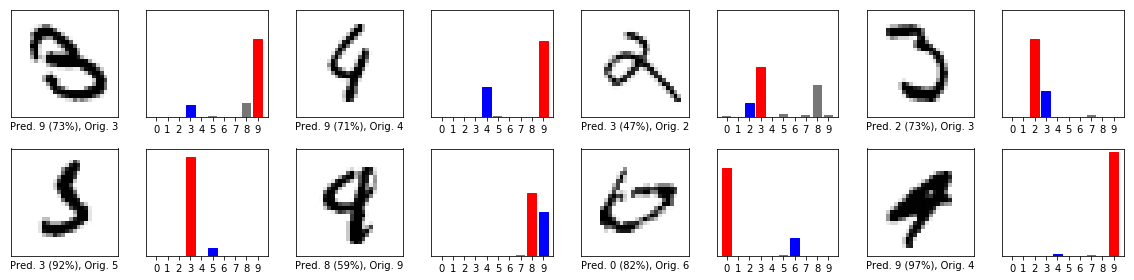

In [29]:
num_rows = 2
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(false[i], predictions[false[i]], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(false[i], predictions[false[i]], y_test)
plt.tight_layout()
plt.show()

In [30]:
check = np.where((np.argmax(predictions, axis = 1) == 9)*(np.argmax(y_test, axis = 1) == 4))[0]
check.shape

(25,)

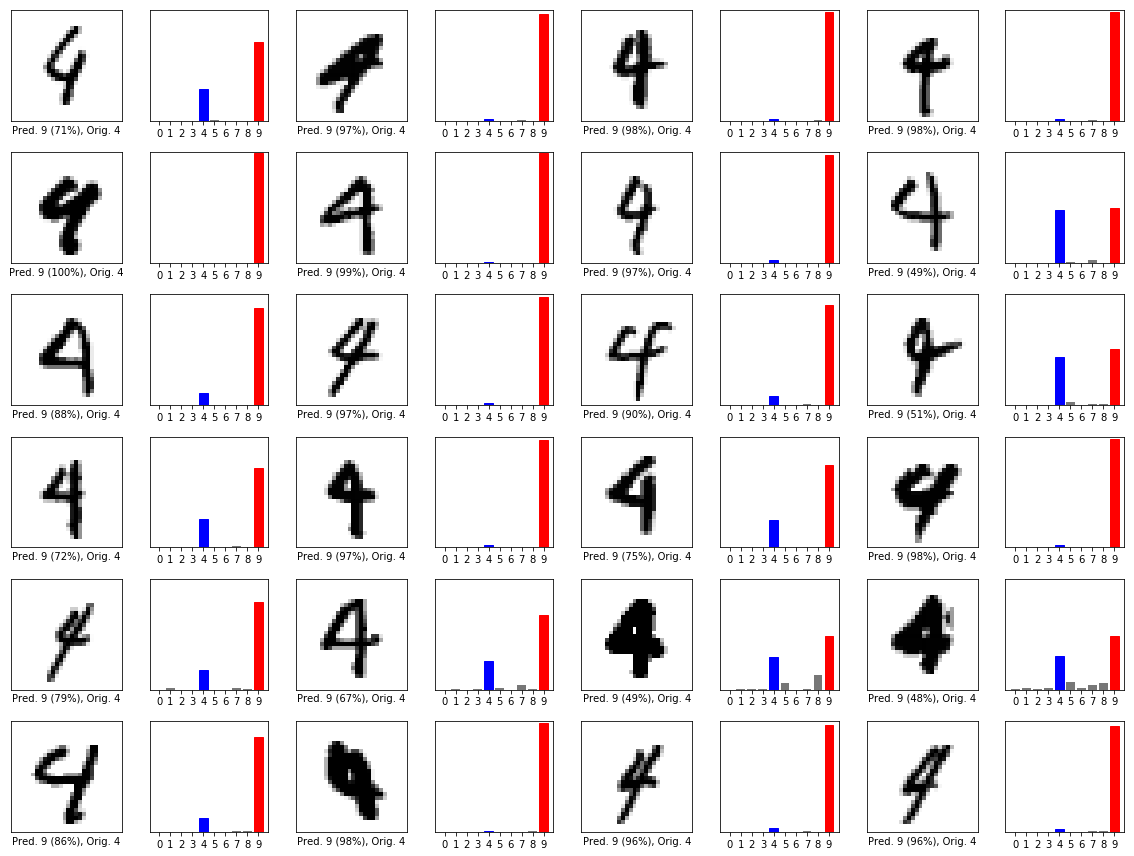

In [32]:
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  try: 
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(check[i], predictions[check[i]], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(check[i], predictions[check[i]], y_test)
  except:
    continue
plt.tight_layout()
plt.show()

In [33]:
check = np.where((np.argmax(predictions, axis = 1) == 7)*(np.argmax(y_test, axis = 1) == 9))[0]
check.shape

(7,)

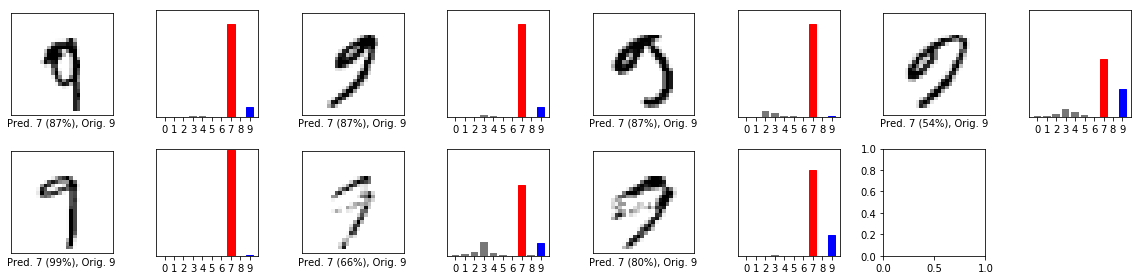

In [34]:
num_rows = 2
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  try: 
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(check[i], predictions[check[i]], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(check[i], predictions[check[i]], y_test)
  except:
    continue
plt.tight_layout()
plt.show()

In [36]:
check = np.where((np.argmax(predictions, axis = 1) == 8)*(np.argmax(y_test, axis = 1) == 9))[0]
check.shape

(6,)

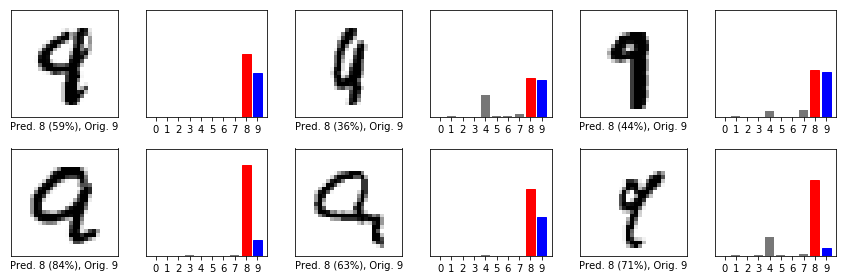

In [38]:
num_rows = 2
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  try: 
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(check[i], predictions[check[i]], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(check[i], predictions[check[i]], y_test)
  except:
    continue
plt.tight_layout()
plt.show()

In [39]:
check = np.where((np.argmax(predictions, axis = 1) == 7)*(np.argmax(y_test, axis = 1) == 2))[0]
check.shape

(3,)

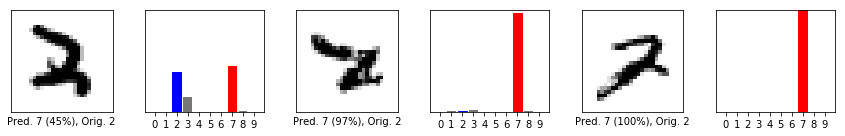

In [41]:
num_rows = 1
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  try: 
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(check[i], predictions[check[i]], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(check[i], predictions[check[i]], y_test)
  except:
    continue
plt.tight_layout()
plt.show()

In [42]:
predictions = model1.predict(x_test)
false = np.where(np.argmax(predictions, axis = 1) != np.argmax(y_test, axis = 1))[0]
predictions = model5.predict(x_test)
false2 = np.where(np.argmax(predictions, axis = 1) != np.argmax(y_test, axis = 1))[0]
print(f'There are {false.shape[0]} images that were wrongly predicted when no data augmentation is applied \n After applying only {false2.shape[0]} images that were wrongly predicted')

There are 220 images that were wrongly predicted when no data augmentation is applied 
 After applying only 124 images that were wrongly predicted


In [46]:
correct = [i for i in false if i not in false2]
print(f'{len(correct)} images that are not correctly identified by model 1, correctly identified by model 5.') 

159 images that are not correctly identified by model 1, correctly identified by model 5.
